# Livro: Python for Algorithmic Trading

# O modelo está com underfit e Overfit:
https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/ 
Estratégias para mitigar underfit:
- Aumentar o número de neuronios e o número de camadas ocultas
- Aumentar complexidade
- Tente treinar o modelo para mais épocas. Certifique-se de que a perda está diminuindo gradualmente ao longo do treinamento. Caso contrário, é altamente provável que haja algum tipo de bug ou problema no próprio código/lógica de treinamento.

https%3A%2F%2Ftowardsdatascience.com%2Ftechniques-for-handling-underfitting-and-overfitting-in-machine-learning-348daa2380b9

Estratégias para mitigar overfit:
- Diminuir épocas de treinamento
- Obtenha mais dados de treinamento 
- Parada antecipada : A parada antecipada é uma forma de regularização para evitar overfitting ao treinar um aluno com um método iterativo, como gradiente descendente 
- Regularização L1, L2
- Dropout

## DNN

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np

data = pd.read_csv('Inteligencia_Artificial/Trabalho de Conclusão de Curso/Base de Dados/2021/BPAC11_30m_2021.csv') 
symbol = "close"
data = pd.DataFrame(data[symbol])
data.rename(columns={symbol: 'price'}, inplace=True)
data['return'] = np.log(data['price']/data['price'].shift(1))
data['direction'] = np.where(data['return'] > 0, 1, 0)


lags = 4
cols = []
for lag in range(1, lags + 1):
     col = f'lag_{lag}'
     data[col] = data['return'].shift(lag)
     cols.append(col)
data.dropna(inplace=True)


print(data[col])

5      -0.003923
6      -0.001276
7      -0.000745
8      -0.003947
9      -0.006003
          ...   
3927    0.007656
3928    0.000000
3929    0.000000
3930    0.000953
3931    0.001428
Name: lag_4, Length: 3927, dtype: float64


In [5]:
cutoff = 3000
training_data = data[data.index < cutoff].copy()
mu, std = training_data.mean(), training_data.std()
training_data_ = (training_data - mu) / std

print(training_data[cols])
print(training_data['direction'])

test_data = data[data.index >= cutoff].copy()
test_data_ = (test_data - mu) / std

print(test_data[cols])

training_data[cols].shape , training_data['direction'].shape, test_data[cols].shape , test_data['direction'].shape

         lag_1     lag_2     lag_3     lag_4
5    -0.003947 -0.000745 -0.001276 -0.003923
6    -0.006003 -0.003947 -0.000745 -0.001276
7    -0.002584 -0.006003 -0.003947 -0.000745
8    -0.003889 -0.002584 -0.006003 -0.003947
9     0.003673 -0.003889 -0.002584 -0.006003
...        ...       ...       ...       ...
2995  0.001213  0.000809 -0.001618 -0.001212
2996 -0.001213  0.001213  0.000809 -0.001618
2997 -0.008124 -0.001213  0.001213  0.000809
2998  0.002444 -0.008124 -0.001213  0.001213
2999 -0.007760  0.002444 -0.008124 -0.001213

[2995 rows x 4 columns]
5       0
6       0
7       0
8       1
9       1
       ..
2995    0
2996    0
2997    1
2998    0
2999    0
Name: direction, Length: 2995, dtype: int64
         lag_1     lag_2     lag_3     lag_4
3000 -0.007821 -0.007760  0.002444 -0.008124
3001  0.020046 -0.007821 -0.007760  0.002444
3002  0.000000  0.020046 -0.007821 -0.007760
3003  0.005654  0.000000  0.020046 -0.007821
3004 -0.003227  0.005654  0.000000  0.020046
...        

((2995, 4), (2995,), (932, 4), (932,))

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import LSTM, Input
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop
import random

optimizer = Adam(learning_rate=0.0001)

model=Sequential()

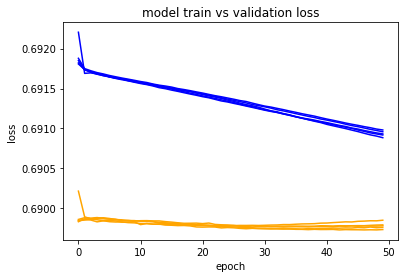

In [ ]:
from pandas import DataFrame
from matplotlib import pyplot

# collect data across multiple repeats
train = DataFrame()
val = DataFrame()
for i in range(5):
	# define model
    model = Sequential()
    model.add(Dense(256 ,input_shape=(lags,),activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
	# compile model
    model.compile(optimizer= optimizer,loss='binary_crossentropy',metrics=['accuracy'])

	# fit model
    model.fit(training_data_[cols],training_data['direction'],epochs=50, verbose=False, validation_split=0.2,shuffle=False)
	# story history
    train[str(i)] = model.history.history['loss']
    val[str(i)] = model.history.history['val_loss']
 
# plot train and validation loss across multiple runs
pyplot.plot(train, color='blue', label='train')
pyplot.plot(val, color='orange', label='validation')
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.show()


começa da primeira camada oculta, pois a entrada não é realmente uma camada
mas informe o formato da entrada, com 4 elementos com este exemplo
https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc


82/82 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5171


[0.6926136612892151, 0.5171483755111694]

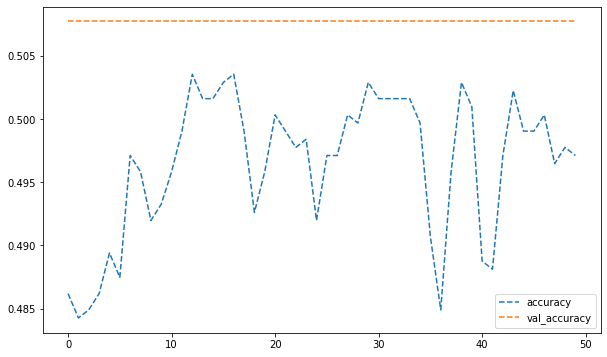

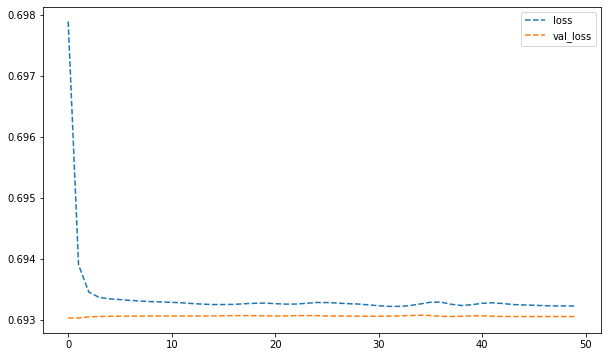

In [ ]:
res = pd.DataFrame(model.history.history)
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');
res[['loss', 'val_loss']].plot(figsize=(10, 6), style='--');

model.evaluate(training_data_[cols], training_data['direction'])